### **Importing Necessary Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Load Bangle Data**

In [5]:
bangle_data = pd.read_csv("Data/HR_Lab_Data_Day_1/HRV121M_Finger_Anticipatory/bangle.csv")
print(bangle_data.head())

    timestamp_ms  value
0  1733942489877   5294
1  1733942489897   5278
2  1733942489918   5246
3  1733942489938   5246
4  1733942489958   5246


### **Plot Bangle Data**

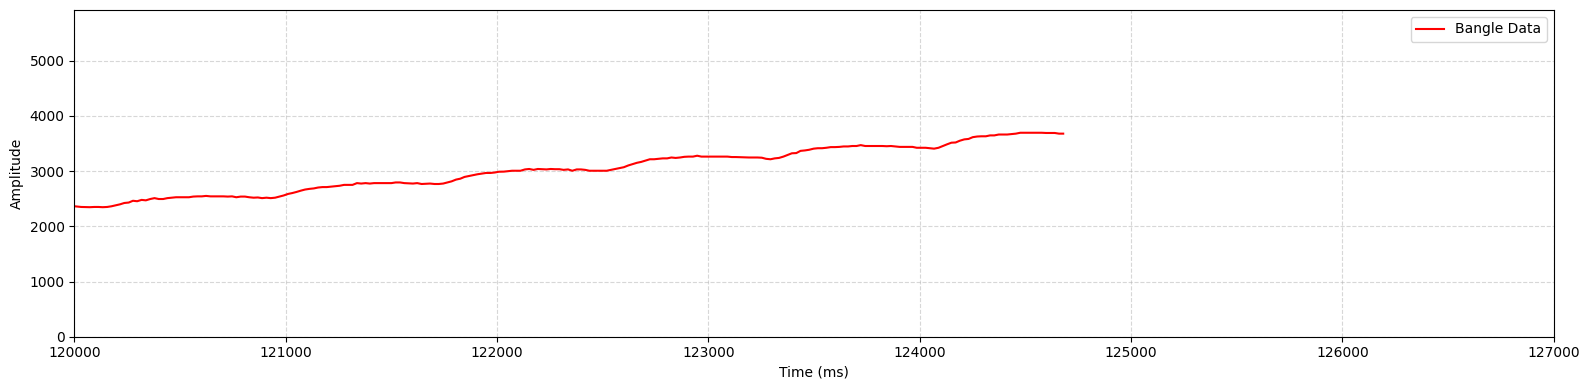

In [7]:
timestamps = bangle_data["timestamp_ms"].to_numpy()
ppg_raw = bangle_data["value"].to_numpy()

' Normalizing timestamp (ms), such that it starts from 0 ms'
t0 = bangle_data["timestamp_ms"].iloc[0]
timestamps = timestamps - t0

plt.figure(figsize=(16, 4))
plt.plot(timestamps, ppg_raw, c='r', label="Bangle Data")
plt.grid(which='both', axis='both', linestyle='--', alpha=0.5)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.legend()
plt.xlim(left=120000, right=127000)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()